## <center> San Francisco Crime Classification </center>

In [17]:
import numpy as np
import pandas as pd

import time
import datetime

import matplotlib.pyplot as plt
# for visualization
import sklearn

from collections import Counter

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

### Show Data Frame

In [18]:
# read the dataset and generate dataframe
crime_df = pd.read_csv('data_20000.csv')
crime_df.head()

,Dates,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Category
0,10/17/2005 10:00,"VEHICLE, RECOVERED, OTHER VEHICLE",Monday,CENTRAL,NONE,LARKIN ST / BEACH ST,-122.422199,37.806435,VEHICLE THEFT
1,8/6/2012 21:00,GRAND THEFT FROM LOCKED AUTO,Monday,INGLESIDE,NONE,300 Block of FRANCONIA ST,-122.407633,37.744617,LARCENY/THEFT
2,3/6/2015 18:05,"DRIVERS LICENSE, SUSPENDED OR REVOKED",Friday,BAYVIEW,"ARREST, BOOKED",REVERE AV / KEITH ST,-122.388295,37.730608,OTHER OFFENSES
3,7/22/2008 19:32,POSSESSION OF METH-AMPHETAMINE,Tuesday,INGLESIDE,"ARREST, BOOKED",100 Block of TINGLEY ST,-122.434391,37.729557,DRUG/NARCOTIC
4,9/6/2014 5:45,"ROBBERY ON THE STREET, STRONGARM",Saturday,CENTRAL,NONE,900 Block of SUTTER ST,-122.416011,37.788227,ROBBERY


### Convert Dates into miliseconds

In [ ]:
# convert date to timestamp (milliseconds, divide by a million to get a more readable decimal)
crime_df['Dates'] = crime_df['Dates'].apply(lambda x: time.mktime(time.strptime(x, '%m/%d/%Y %H:%M'))/1000000)

crime_df.head()


### Show Label

In [4]:
y = crime_df['Category'] 

print(y)
print(y.shape)

0                 VEHICLE THEFT
1                 LARCENY/THEFT
2                OTHER OFFENSES
3                 DRUG/NARCOTIC
4                       ROBBERY
5                OTHER OFFENSES
6                 LARCENY/THEFT
7                SUSPICIOUS OCC
8                OTHER OFFENSES
9                  NON-CRIMINAL
10       FORGERY/COUNTERFEITING
11                DRUG/NARCOTIC
12                      ROBBERY
13                LARCENY/THEFT
14                LARCENY/THEFT
15                      ASSAULT
16                  WEAPON LAWS
17                DRUG/NARCOTIC
18               OTHER OFFENSES
19                      ASSAULT
20               OTHER OFFENSES
21       FORGERY/COUNTERFEITING
22                      ASSAULT
23                LARCENY/THEFT
24                VEHICLE THEFT
25                     WARRANTS
26                     WARRANTS
27                VEHICLE THEFT
28                LARCENY/THEFT
29                LARCENY/THEFT
                  ...          
19970   

# Visualization Plotting

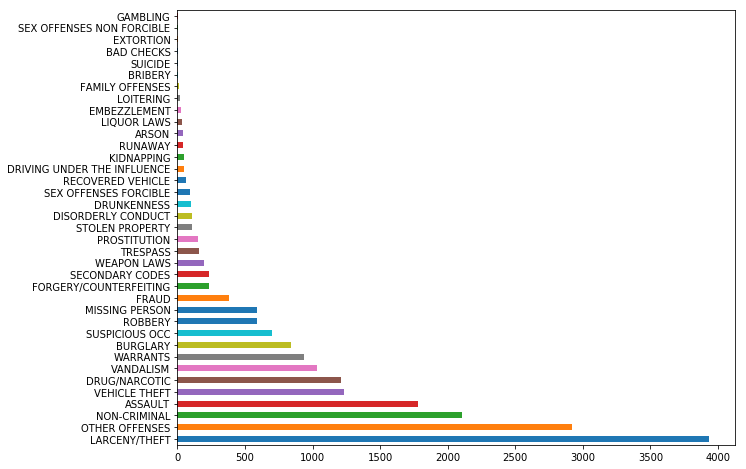

In [20]:
crime_df.category.value_counts().plot(kind='barh', figsize=(10,8))

### Convert columns which is non-numeric data type to series of words. Each words will be a new column

In [5]:
my_list = ['Dates','Descript','DayOfWeek','PdDistrict','Resolution','Address','X','Y','Category']

def string_to_series_of_words(x):    
    return pd.Series(x.split(" "))


for f in my_list[1:6]:
    crime_df[f] = crime_df[f].apply(string_to_series_of_words)


### use get_dummies to put dummy variables

In [6]:
crime_df=pd.get_dummies(crime_df,columns=['Descript','DayOfWeek','PdDistrict','Resolution','Address'],
                  drop_first=False)

crime_df.head()


new_features = list(crime_df.dtypes.index)
new_features.remove('Category')

X = crime_df[new_features]

print(X)

print(new_features)

print("\nTotal features: ", len(new_features))

            Dates           X          Y  Descript_ABANDONMENT  \
0      1129.56840 -122.422199  37.806435                     0   
1      1344.31200 -122.407633  37.744617                     0   
2      1425.69390 -122.388295  37.730608                     0   
3      1216.78032 -122.434391  37.729557                     0   
4      1410.00750 -122.416011  37.788227                     0   
5      1145.42706 -122.464175  37.763179                     0   
6      1397.88360 -122.403405  37.775421                     0   
7      1188.87000 -122.436247  37.761477                     0   
8      1082.26980 -122.492068  37.714362                     0   
9      1397.86200 -122.497242  37.751396                     0   
10     1153.84680 -122.429138  37.725135                     0   
11     1299.94224 -122.389421  37.729354                     0   
12     1291.46592 -122.505923  37.761340                     0   
13     1202.50080 -122.396556  37.794117                     0   
14     129

## Try Various Classifiers

### Decision Tree

In [7]:
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

decision_tree =  DecisionTreeClassifier(criterion='entropy', min_samples_split=4, random_state=0)
decision_tree.fit(X_train, y_train)

# predict label
prediction = decision_tree.predict(X_test)

# compare to actual label
accuracy = accuracy_score(y_test, prediction)

print("Decision Tree Accuracy: ", accuracy) 

Decision Tree Accuracy:  0.929


### Random Forest

In [8]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

random_forest =  RandomForestClassifier(n_estimators = 50, bootstrap = True, random_state=0, criterion='entropy')
random_forest.fit(X_train, y_train)

prediction = random_forest.predict(X_test)

accuracy = accuracy_score(y_test, prediction)

print("Random Forest Accuracy: ", accuracy) 

Random Forest Accuracy:  0.9425


### Ada Boost

In [9]:
from sklearn.ensemble import AdaBoostClassifier

decision_tree = DecisionTreeClassifier()

clf = AdaBoostClassifier(n_estimators=100, base_estimator=decision_tree,learning_rate=1)
clf.fit(X_train, y_train)

prediction = clf.predict(X_test)

accuracy = accuracy_score(y_test, prediction)

print("Ada Boost Accuracy: ", accuracy)

Ada Boost Accuracy:  0.954


### Logistic Regression

In [10]:
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)

prediction = logistic_regression.predict(X_test)

accuracy = accuracy_score(y_test, prediction)

print("Logistic Regression Accuracy: ", accuracy)

Logistic Regression Accuracy:  0.9615


In [11]:
### Try Cross Validation with Logistic Regression

In [12]:
from sklearn.model_selection import cross_val_score

accuracy_list = cross_val_score(logistic_regression, X, y, cv=10, scoring='accuracy')

# accuracy average
accuracy_crossValidation = accuracy_list.mean()

print("Accuracy with cross validation: ", accuracy_crossValidation)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


Accuracy with cross validation:  0.9572052689721351


### prediction probabilities

In [13]:
print("Prediction Probabilities")

print('\n')

y_predict_proba = logistic_regression.predict_proba(X_test)
print(y_predict_proba)

Prediction Probabilities


[[8.91595426e-04 3.80588154e-03 1.30530874e-04 ... 4.29073453e-04
  4.62328892e-04 2.56907673e-03]
 [1.44530717e-03 1.34956587e-02 1.99656069e-04 ... 1.49685026e-03
  1.06092064e-03 2.82252502e-03]
 [2.55860357e-04 8.77943203e-04 1.18993249e-04 ... 4.85723532e-03
  3.23671289e-04 7.34425928e-04]
 ...
 [3.19990337e-04 2.94473073e-03 5.24873134e-05 ... 8.98342891e-05
  1.89950686e-03 3.45457372e-03]
 [6.68085613e-04 1.63134004e-03 2.80269603e-04 ... 5.32380748e-03
  3.67972587e-04 8.30862319e-04]
 [4.51259814e-04 1.17352952e-03 1.34000373e-04 ... 1.44661679e-04
  3.70589311e-04 6.26702353e-04]]


### show Confusion Matrix

In [14]:
from sklearn import metrics

print("confusion matrix")

print(metrics.classification_report(y_test, prediction))

metrics.confusion_matrix(y_test, prediction)

confusion matrix
                             precision    recall  f1-score   support

                      ARSON       1.00      1.00      1.00         4
                    ASSAULT       0.98      0.98      0.98       172
                 BAD CHECKS       0.00      0.00      0.00         1
                   BURGLARY       1.00      0.99      0.99        87
         DISORDERLY CONDUCT       1.00      1.00      1.00        11
DRIVING UNDER THE INFLUENCE       1.00      1.00      1.00         5
              DRUG/NARCOTIC       0.96      0.98      0.97       127
                DRUNKENNESS       1.00      1.00      1.00         8
            FAMILY OFFENSES       0.00      0.00      0.00         3
     FORGERY/COUNTERFEITING       0.96      0.96      0.96        25
                      FRAUD       0.89      0.86      0.88        37
                 KIDNAPPING       1.00      0.25      0.40         4
              LARCENY/THEFT       1.00      0.97      0.98       363
                

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


array([[  4,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0],
       [  0, 168,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   2,   0,   0,   2,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0],
       [  0,   0,   0,  86,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0],
       [  0,   0,   0,   0,  11,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   5,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,

### SVM

In [15]:
from sklearn.svm import SVC
from sklearn import svm

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)

accuracy = clf.score(X_test, y_test)

print("SVM Accuracy: ", accuracy)

SVM Accuracy:  0.9642


### K - Nearest Neighbors

In [16]:
from sklearn.neighbors import KNeighborsClassifier

k=50
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)

knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

prediction = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_predict)

print("KNN Accuracy: ", accuracy)

NameError: name 'y_predict' is not defined

### Neural Networks

In [ ]:
from sklearn.neural_network import MLPClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3, random_state=0)

clf = MLPClassifier(solver='lbfgs',hidden_layer_sizes=(8), random_state=0)
clf.fit(X_train,y_train)

prediction = clf.predict(X_test)

accuracy = accuracy_score(y_test, prediction)

print("Neural Networks Accuracy: ", accuracy)

### ANN

In [ ]:
from sklearn.neural_network import MLPClassifier

# ANN is an instance of MLPClassifier class
ANN = MLPClassifier(hidden_layer_sizes=(80,), activation= 'logistic', solver='adam', alpha=1e-5, 
                       random_state=1, learning_rate_init = 0.002)


ANN.fit(X_train, y_train)

prediction = ANN.predict(X_test)

accuracy = accuracy_score(y_test, prediction)

print("ANN Accuracy: ", accuracy)

### Naive Bayes

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.06, random_state=1)

In [ ]:
decision_tree =  DecisionTreeClassifier(criterion='entropy')

decision_tree.fit(X_train, y_train)
prediction = decision_tree.predict(X_test)

accuracy = accuracy_score(y_test, prediction)

print("Decision Tree Accuracy: ", accuracy, "\n") 